In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gymnasium as gym

In [19]:
class Agent():
    def __init__(self, obs_dim, act_dim, c=2.0, epsilon=0.2) -> object:
        self.obs_dim = obs_dim
        self.act_dim = act_dim
        self.max_dim = obs_dim * act_dim
        self.epsilon = epsilon
        self.ucb_Na = np.zeros(self.act_dim)
        self.ucb_c = c
        

    def get_1dvec(self, s:int, a:int) -> np.ndarray:
        vec = np.zeros(self.max_dim)
        vec[s + a * self.obs_dim] = 1
        return vec
    

    
    def a_epsilon_greedy(self, s, w:np.ndarray):
        all_q_ai = self.get_allq(s, w)
    
        if np.random.rand() < self.epsilon:
            out_a = np.random.choice(self.act_dim)

        else:
            out_a = np.argmax(all_q_ai)
        return out_a, all_q_ai
    

    def act_ucb(self, s, w, t):
        if (self.ucb_Na ==0).any():
            out_a, all_q_ai = self.a_epsilon_greedy(s, w)
        else:
            all_q_ai = self.get_allq(s, w)
            ucb_vals = all_q_ai + self.ucb_c * np.sqrt(np.log(t)/self.ucb_Na)

            out_a = np.argmax(ucb_vals)
        self.ucb_Na[out_a] += 1
        return out_a, all_q_ai

    def get_allq(self, s:int, w:np.ndarray):
        all_q_ai = np.zeros(self.act_dim)
        for ai in range(self.act_dim):
            vec = self.get_1dvec(s, ai)
            q_ai = np.dot(vec, w)
            all_q_ai[ai] = q_ai
        return all_q_ai



# SARSA(1)

episode 0, t=1175
episode 500, t=101
episode 1000, t=47
episode 1500, t=339
episode 2000, t=167
episode 2500, t=921
episode 3000, t=105
episode 3500, t=81
episode 4000, t=103
episode 4500, t=105


array([-2.29016575e+01, -5.01439946e+00, -3.52118021e+01, -4.98425070e+00,
       -2.61949252e+01, -2.60504267e+00, -1.93698096e+01, -2.33305640e+00,
       -2.01789088e+01, -2.27700698e+00, -1.04381220e+01, -9.45216904e+00,
       -3.87389724e+00, -2.73748329e+00, -1.99727332e+00, -2.49718060e+00,
       -7.86689264e-01, -1.61048714e+00, -4.08828167e-01, -1.64389906e+00,
       -9.87521506e-01, -1.56170638e+00, -4.04491000e-01, -1.58160645e+00,
       -3.51508507e+00, -8.09547550e-01, -2.50286608e+00, -7.12955961e-02,
       -1.33338085e+00, -4.71445020e-02, -1.04958411e+00, -4.45986458e-02,
       -1.26116875e+00, -3.28139684e-02, -1.58416648e+00, -9.93282401e-01,
       -2.19261814e+01,  1.54017014e-03, -2.67026819e-03, -1.47425054e-03,
       -1.92550690e-03,  4.26627798e-04, -1.74651021e-03, -5.67408017e-04,
        3.91628789e-04, -5.82290629e-04,  7.77711950e-04,  1.17693099e-03,
       -2.26563081e+01, -5.91421162e+00, -3.50611274e+01, -5.88435398e+00,
       -2.59491484e+01, -

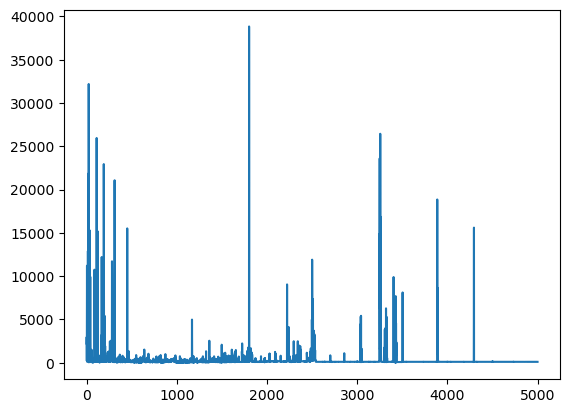

In [42]:
env = gym.make('CliffWalking-v0')
obs_dim = 48
act_dim = 4
ag = Agent(obs_dim, act_dim, c=2.0, epsilon=0.1)
gamma = 0.98
alpha = 0.01

w = np.random.normal(0, 0.001, size=ag.max_dim)

Niters = 5000
all_ts = np.zeros(Niters)

for ni in range(Niters):
    if ni % 500 == 0:
        print('episode %d, t=%d'% (ni, t))
        alpha = alpha/2
        ag.epsilon = ag.epsilon/2
    t = 1
    terminated, truncated = False, False
    s, _ = env.reset()
    
    a, _ = ag.a_epsilon_greedy(s, w)
    
    while (terminated is False) :
        
        sa_vec = ag.get_1dvec(s, a)
        q_now = np.dot(sa_vec, w)

        s_next, r_next, terminated, truncated, _ = env.step(a)
        a_next, all_q_next = ag.a_epsilon_greedy(s, w)
        q_next = all_q_next[a_next]


        if terminated:
            td_err = r_next - q_now
        else:
            td_err = r_next + gamma * q_next - q_now

        # grad_q = sa_vec
        # dw = td_err * grad_q
        # w = w + alpha * dw

        w[s + a * ag.obs_dim] += alpha * td_err
        s = s_next
        a = a_next

        t += 1

    all_ts[ni] = t


plt.plot(all_ts)




w

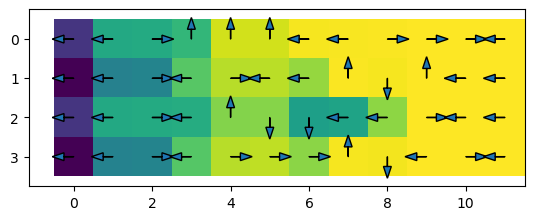

In [43]:
w2d = w.reshape(ag.obs_dim, ag.act_dim)
w3d = w2d.reshape(4, 12, ag.act_dim)

maxq2d = np.max(w3d, axis=2)
plt.imshow(maxq2d)

for r in range(4):
    for c in range(12):

        q4 = w3d[r, c, :]
        besta = np.argmax(q4)

        if besta == 0: # 0: Move up
            vec = np.array([0, 1])
        elif besta == 1:
            vec = np.array([1, 0])            
        elif besta == 2:
            vec = np.array([0, -1])
        elif besta == 3:
            vec = np.array([-1, 0])
        else:
            raise
        vec = vec * 0.25
        plt.arrow(c, r, vec[0], vec[1], head_width=0.2)
        

        # 1: Move right
        # 2: Move down
        # 3: Move left
        

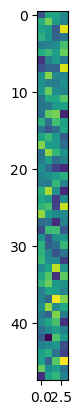

In [9]:
plt.imshow(w.reshape(oh.obs_dim, -1))

In [8]:
w

array([-9.90443028e-03,  6.40676185e-03,  5.95412702e-03,  8.84674558e-04,
        7.77557451e-03,  1.54547741e-02,  4.45763579e-03, -2.64037355e-04,
        5.29892199e-03,  4.21048275e-03, -8.06935111e-03,  2.35715124e-02,
        8.73567091e-03,  3.22036296e-03, -6.49984051e-03, -3.40365940e-03,
       -1.62179642e-03, -4.94965206e-04,  1.59058139e-03,  1.17040300e-02,
        7.40811346e-03,  1.05943399e-02,  4.29319812e-03,  1.46916244e-02,
       -1.42040736e-02, -9.95827687e-04,  3.83311002e-03, -2.45792092e-03,
       -9.67027693e-03, -6.16362282e-03, -6.43883786e-03,  2.27032897e-02,
        2.38940838e-03,  1.68680269e-02,  2.66479447e-04, -6.88827229e-04,
        2.21630845e-03, -1.09594690e-03, -2.05364544e-03,  2.04677020e-03,
        3.30052651e-03,  1.44193264e-02,  1.36939547e-03, -2.05796211e-05,
       -3.44545161e-03,  6.39556241e-03,  6.57075485e-03,  1.31012315e-02,
       -3.30528083e-03, -2.46713198e-03,  3.63686187e-03,  5.26344521e-03,
       -3.47005921e-03,  

In [44]:
env = gym.make('CliffWalking-v0', render_mode='human')

obs_dim = 48
act_dim = 4
ag = Agent(obs_dim, act_dim, c=2.0, epsilon=0)


Niters = 5000

for ni in range(Niters):
    terminated, truncated = False, False
    s, _ = env.reset()
    a, _ = ag.a_epsilon_greedy(s, w)
    while (terminated is False) :
        

        s_next, r_next, terminated, truncated, _ = env.step(a)
        a_next, all_q_next = ag.a_epsilon_greedy(s, w)

        s = s_next
        a = a_next

KeyboardInterrupt: 

In [96]:
afoo = 2
s_next, r_next, terminated, truncated, _ = env.step(afoo)
print(s_next, r_next, terminated, truncated, _)

47 -1 True False {'prob': 1.0}


In [21]:
env.close()